In [1]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
from plot_data import plot_sensor_measurement, plot_sensor_calibration, plot_wind_rose


start_date = datetime(2023, 9, 21, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 3, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20]
quickflow_directory = "/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/"


In [2]:
df = pl.scan_parquet(os.path.join(quickflow_directory, "measurements.parquet")) 
df.tail(5).collect()

revision,creation_timestamp,receipt_timestamp,gmp343_raw,gmp343_compensated,gmp343_filtered,bme280_temperature,bme280_humidity,bme280_pressure,sht45_temperature,sht45_humidity,gmp343_temperature,enclosure_bme280_temperature,enclosure_bme280_humidity,enclosure_bme280_pressure,raspi_cpu_temperature,raspi_disk_usage,raspi_cpu_usage,raspi_memory_usage,wxt532_direction_min,wxt532_direction_avg,wxt532_direction_max,wxt532_speed_min,wxt532_speed_avg,wxt532_speed_max,wxt532_last_update_time,sensor_name,configuration
i32,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
7,2023-09-21 15:30:28.510 UTC,2023-09-21 15:30:29.318158 UTC,32.0,31.97,358.1,414.5,921.11,417.7,28.73,30.33,31.02,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
9,2023-09-21 15:30:28.440 UTC,2023-09-21 15:30:30.038957 UTC,31.6,33.05,369.1,426.1,924.22,429.7,31.72,29.94,30.4,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
9,2023-09-21 15:30:34.040 UTC,2023-09-21 15:30:34.220916 UTC,31.3,36.42,348.0,407.5,910.45,408.0,34.65,30.12,30.26,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
16,2023-09-21 15:30:32.850 UTC,2023-09-21 15:30:34.607265 UTC,31.6,32.59,351.7,406.8,917.57,408.0,28.12,30.5,30.58,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
16,2023-09-21 15:30:32.910 UTC,2023-09-21 15:30:34.694539 UTC,null,null,null,null,null,null,null,null,null,940.69,null,null,37.0,0.388,57.9,18.06,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"


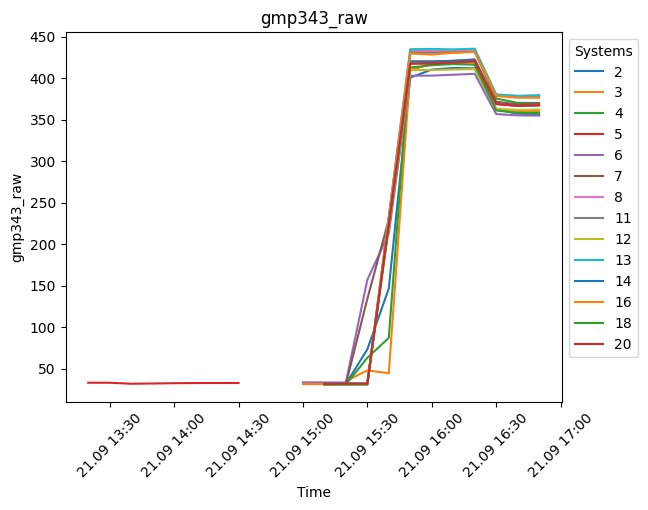

In [3]:
plot_sensor_measurement(df,col_name="gmp343_raw",sensor_id=sensor_id,filter='10m')

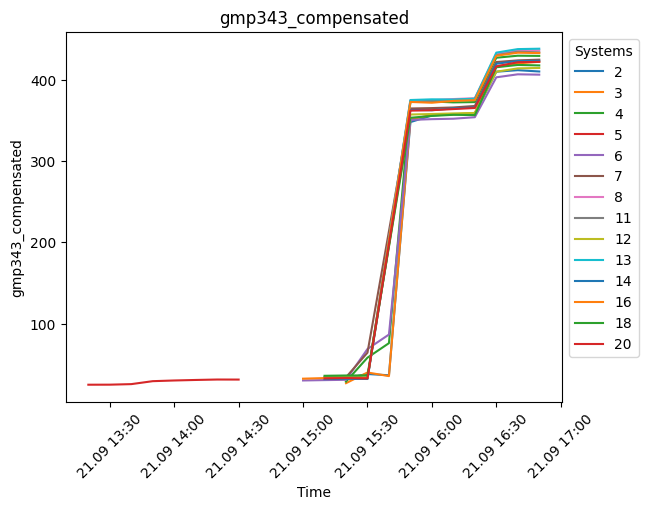

In [4]:
plot_sensor_measurement(df,col_name="gmp343_compensated",sensor_id=sensor_id,filter='10m')

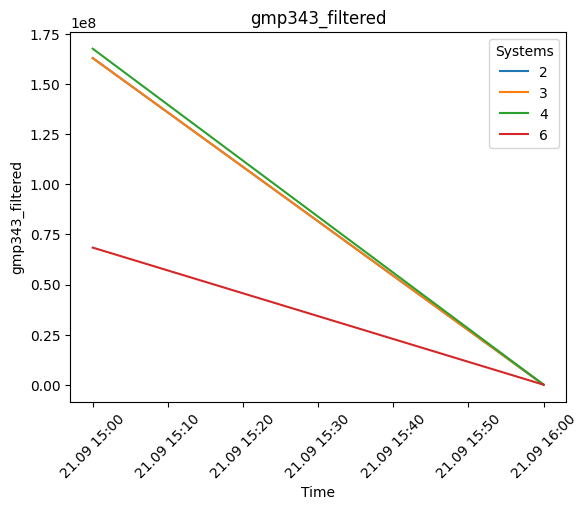

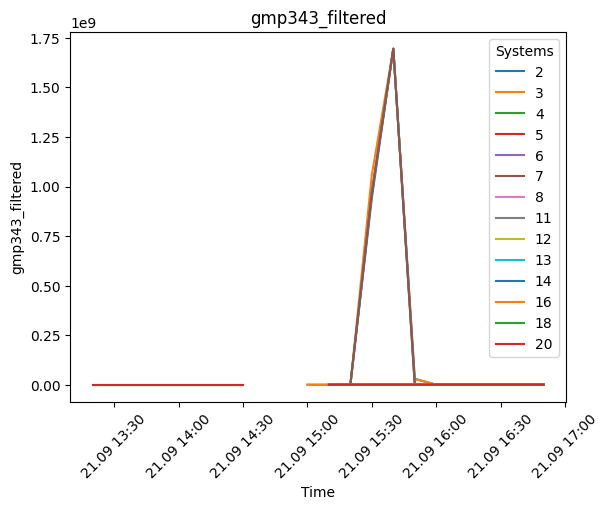

In [5]:
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=[1,2,3,4,6],filter='1h')
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=sensor_id,filter='10m')

In [6]:
# Maisach
plot_wind_rose(df,1, 'Maisach')
# Rechts-der-Isar
plot_wind_rose(df,2, 'Rechts-der-Isar')
# Finsing
plot_wind_rose(df,3, 'Finsing')
# Großhadern
plot_wind_rose(df,4, 'Großhadern')
# plot wind at 3m pole inlet
plot_wind_rose(df,7, 'TUM')

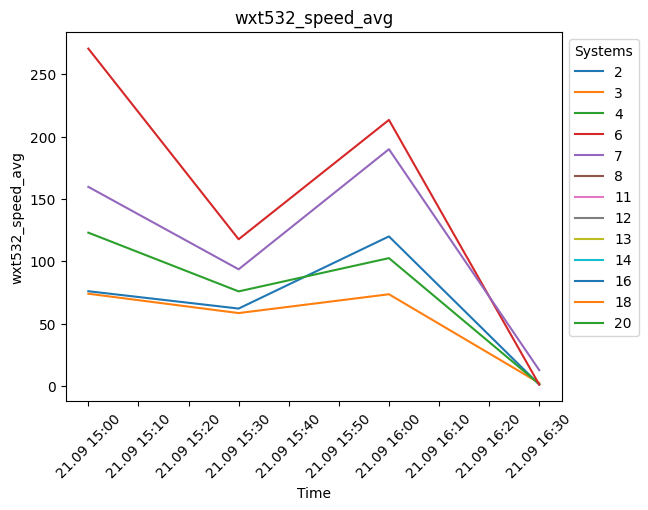

In [7]:
plot_sensor_measurement(df,col_name="wxt532_speed_avg",sensor_id=sensor_id,filter='30m')

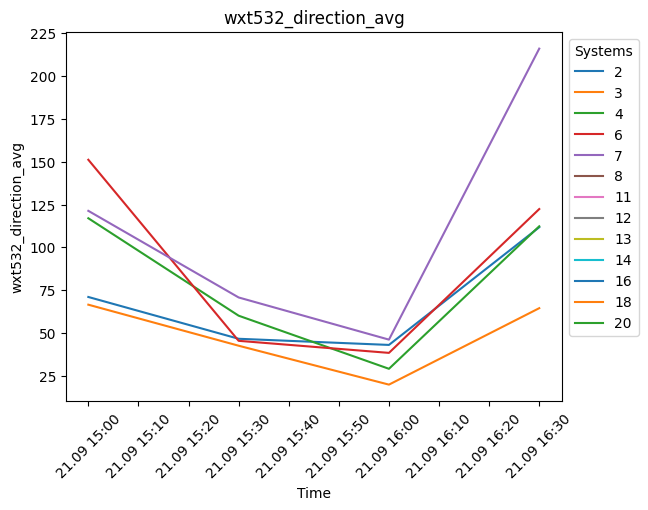

In [8]:
plot_sensor_measurement(df,col_name="wxt532_direction_avg",sensor_id=sensor_id,filter='30m')

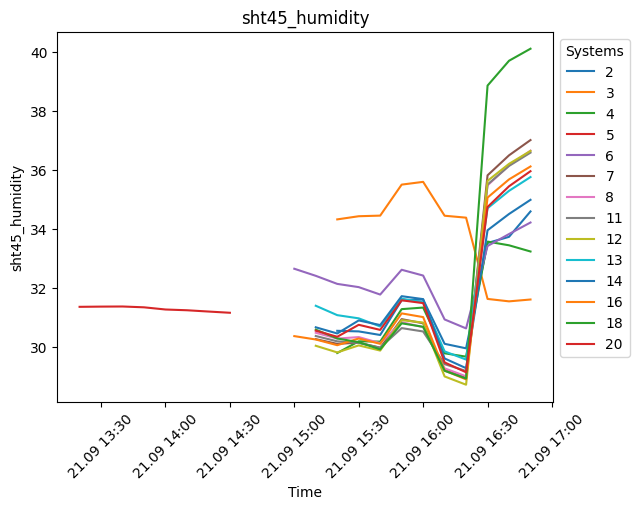

In [9]:
# Plot auxilliary data
plot_sensor_measurement(df,col_name="sht45_humidity",sensor_id=sensor_id,filter='10m')

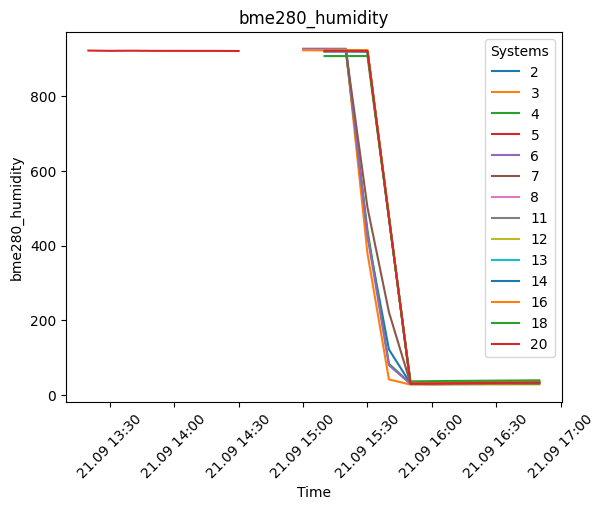

In [10]:
plot_sensor_measurement(df,col_name="bme280_humidity",sensor_id=sensor_id,filter='10m')

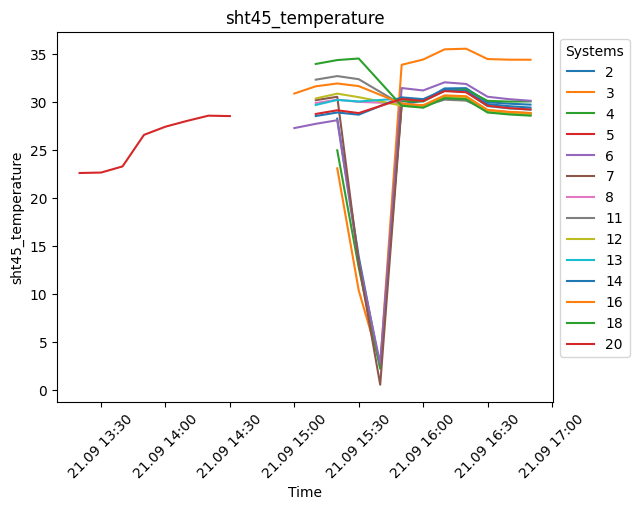

In [11]:
plot_sensor_measurement(df,col_name="sht45_temperature",sensor_id=sensor_id,filter='10m')

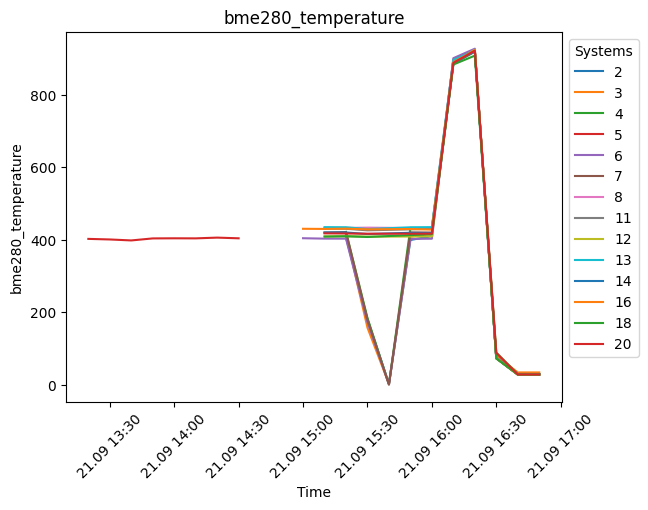

In [12]:
plot_sensor_measurement(df,col_name="bme280_temperature",sensor_id=sensor_id,filter='10m')

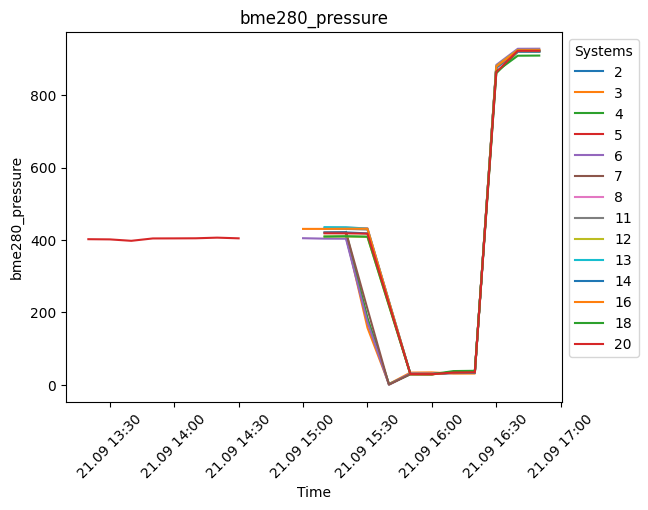

In [13]:
plot_sensor_measurement(df,col_name="bme280_pressure",sensor_id=sensor_id,filter='10m')

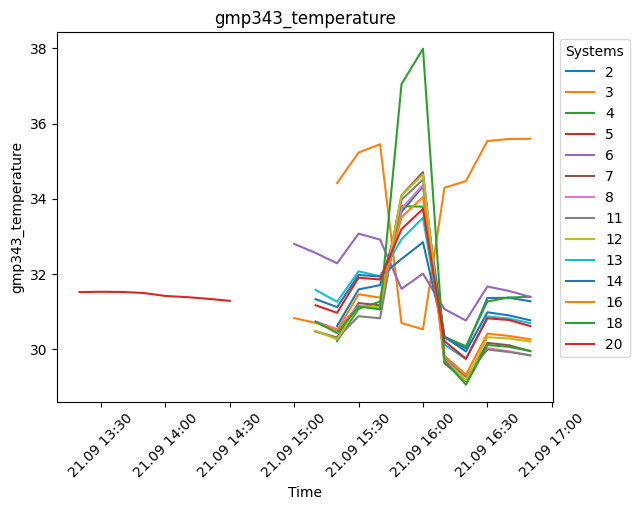

In [14]:
plot_sensor_measurement(df,col_name="gmp343_temperature",sensor_id=sensor_id,filter='10m')

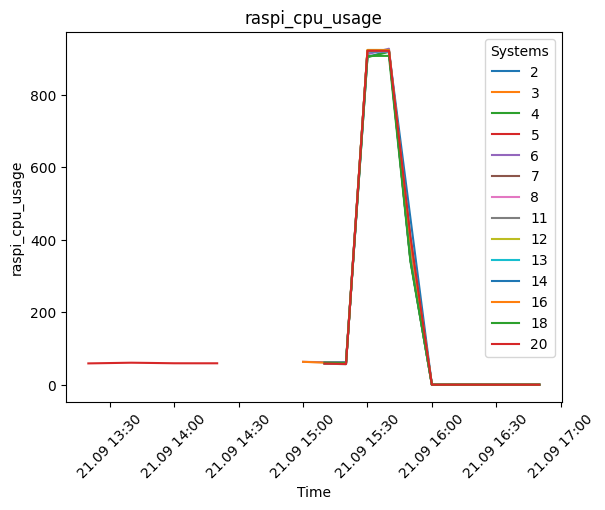

In [15]:
plot_sensor_measurement(df,col_name="raspi_cpu_usage",sensor_id=sensor_id,filter='10m')

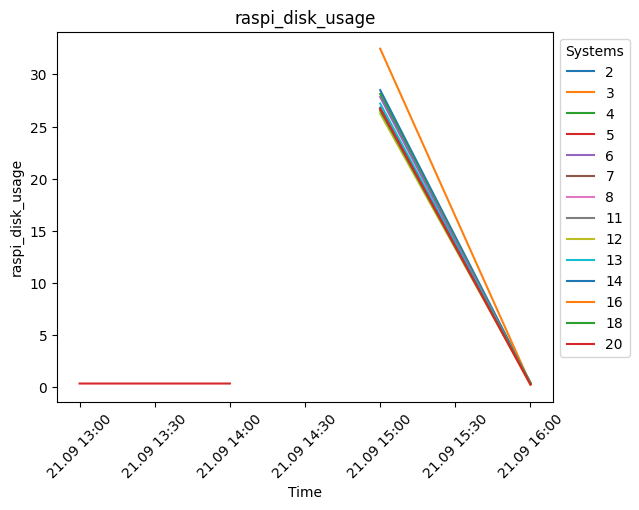

In [16]:
plot_sensor_measurement(df,col_name="raspi_disk_usage",sensor_id=sensor_id,filter='1h')

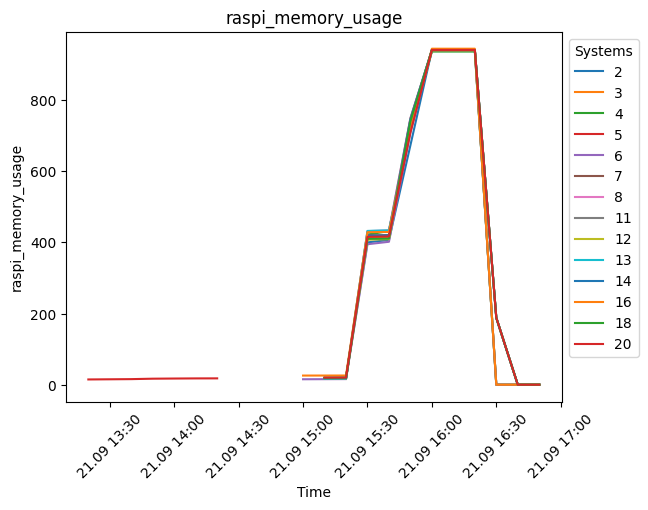

In [17]:
plot_sensor_measurement(df,col_name="raspi_memory_usage",sensor_id=sensor_id,filter='10m')

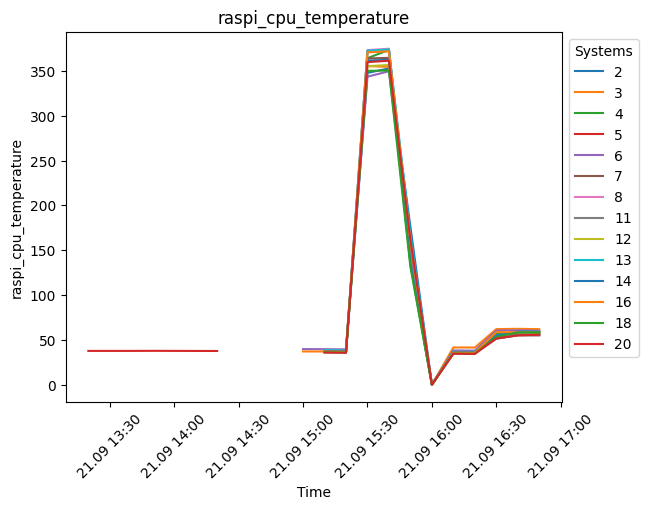

In [18]:
plot_sensor_measurement(df,col_name="raspi_cpu_temperature",sensor_id=sensor_id,filter='10m')

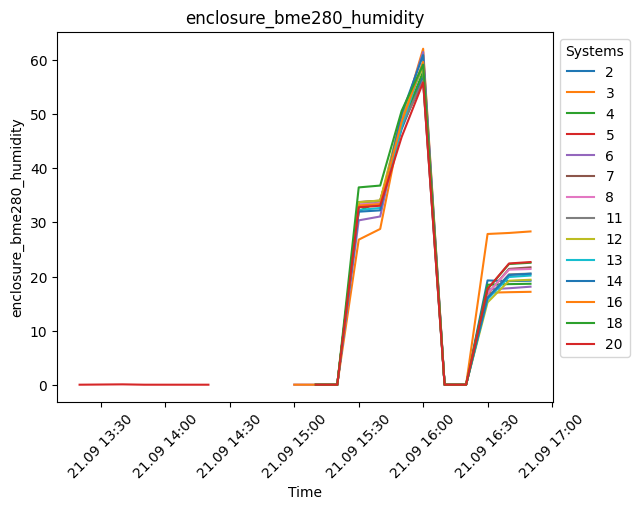

In [19]:
plot_sensor_measurement(df,col_name="enclosure_bme280_humidity",sensor_id=sensor_id,filter='10m')

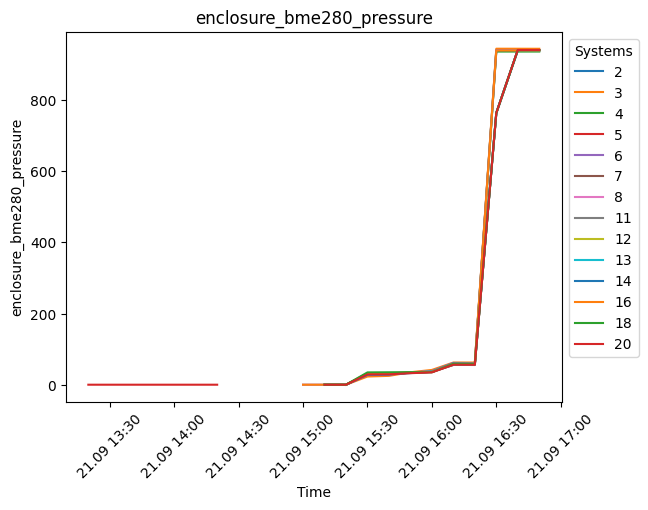

In [20]:
plot_sensor_measurement(df,col_name="enclosure_bme280_pressure",sensor_id=sensor_id,filter='10m')

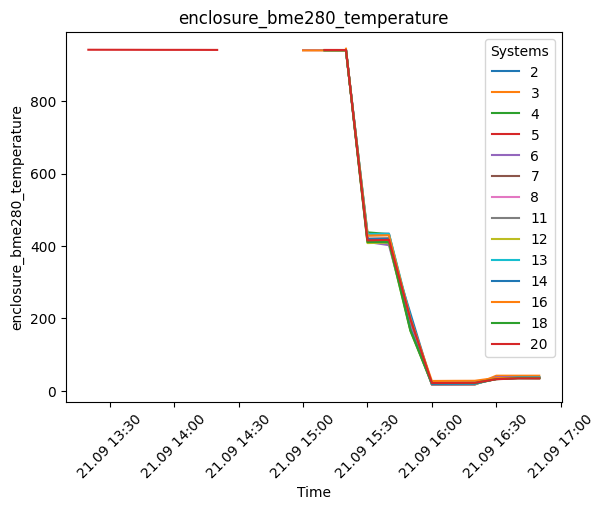

In [21]:
plot_sensor_measurement(df,col_name="enclosure_bme280_temperature",sensor_id=sensor_id,filter='10m')

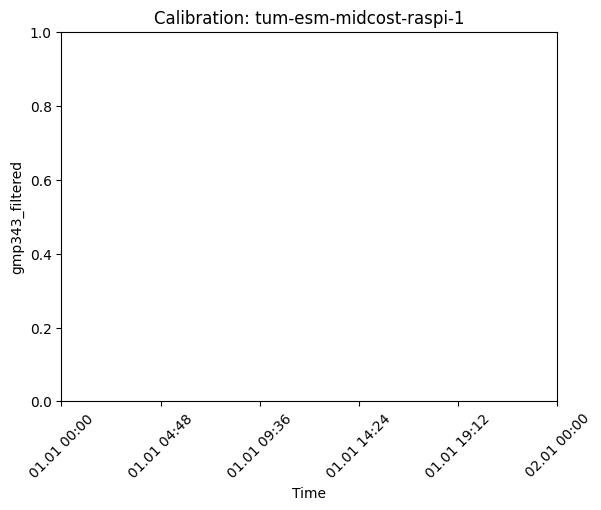

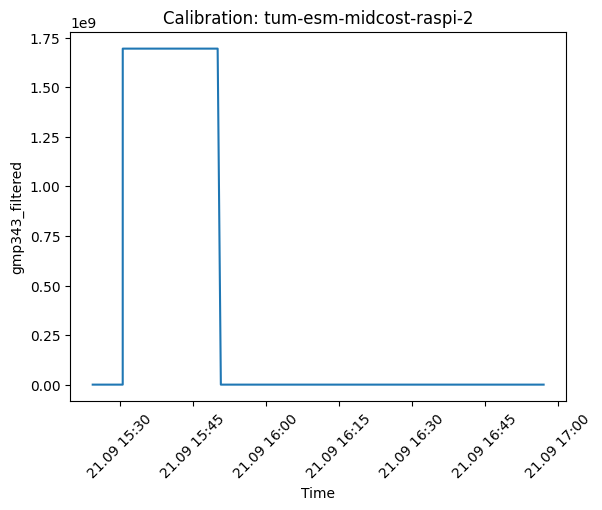

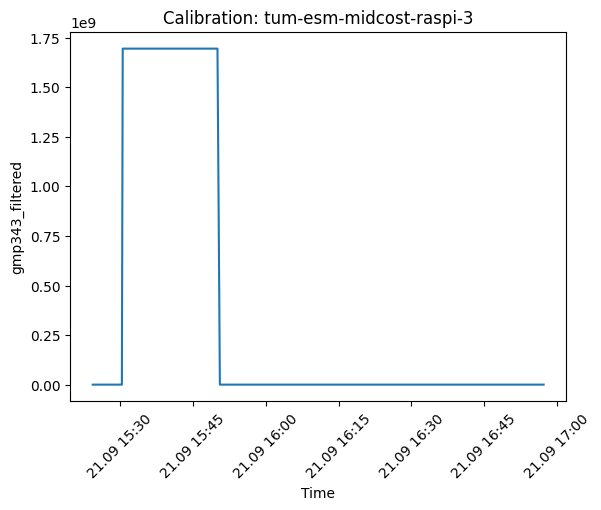

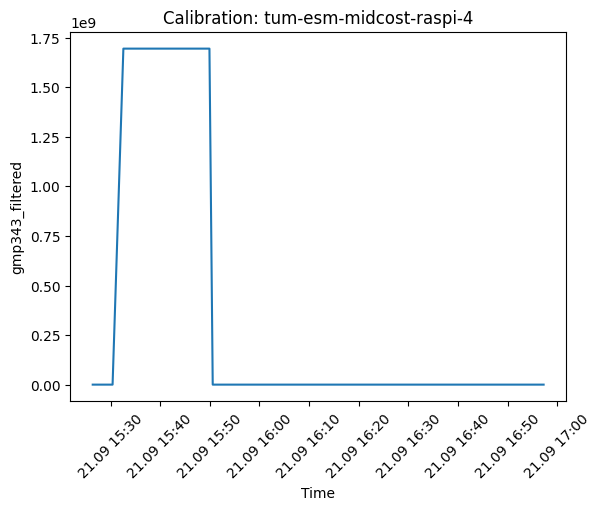

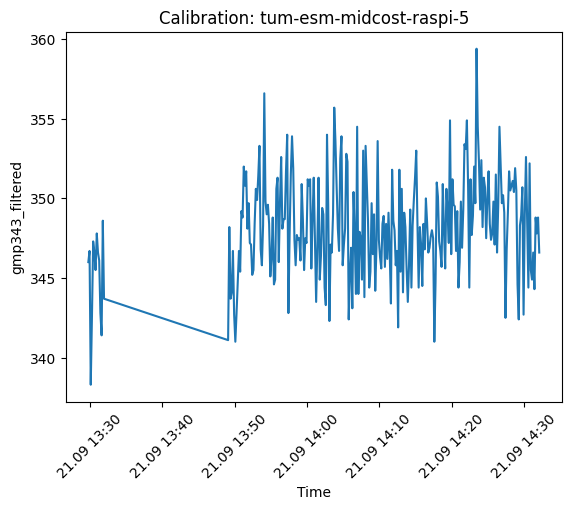

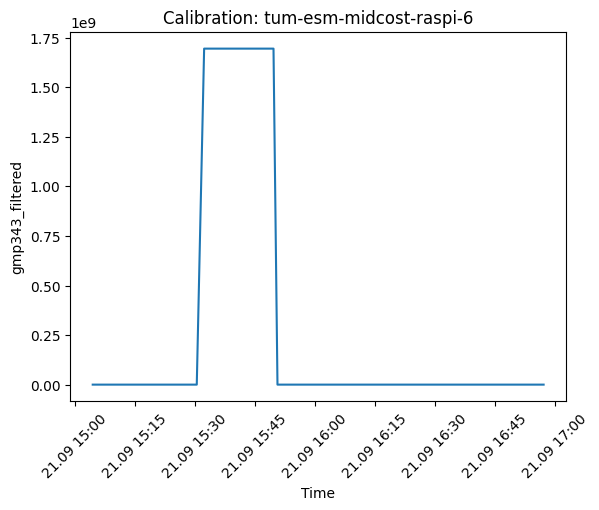

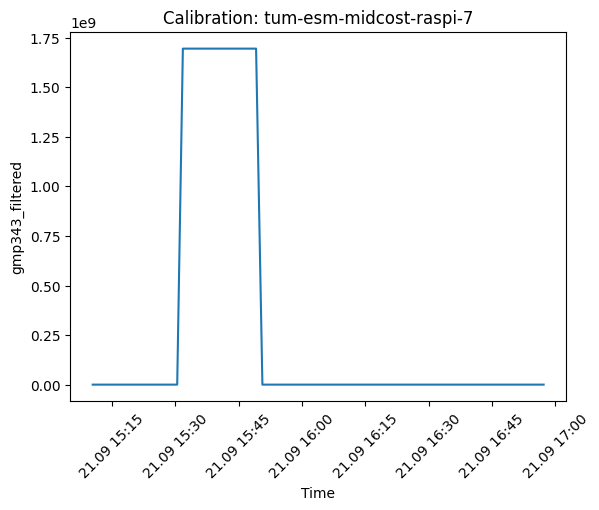

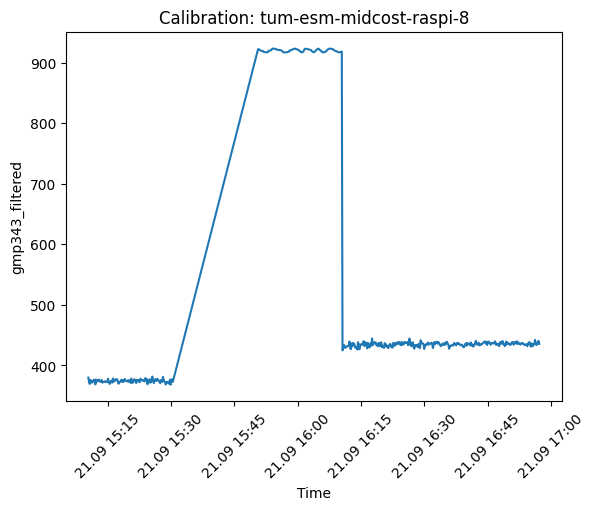

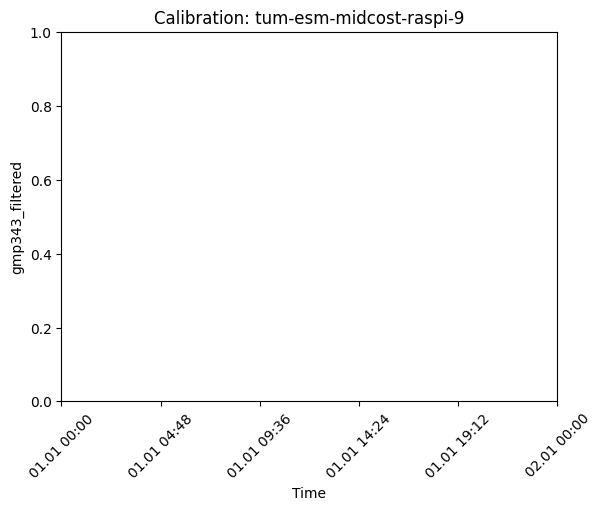

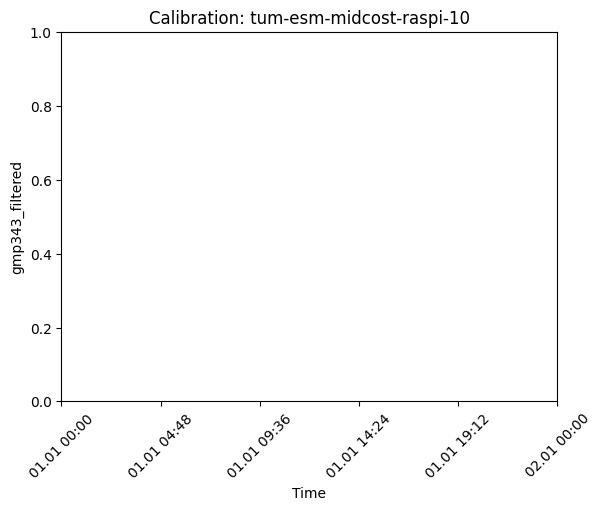

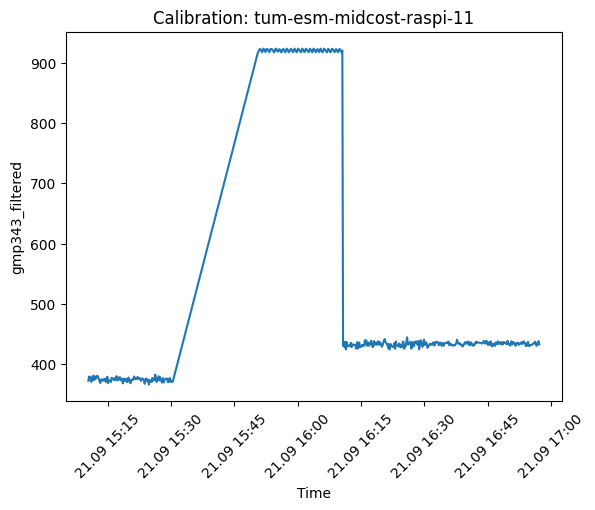

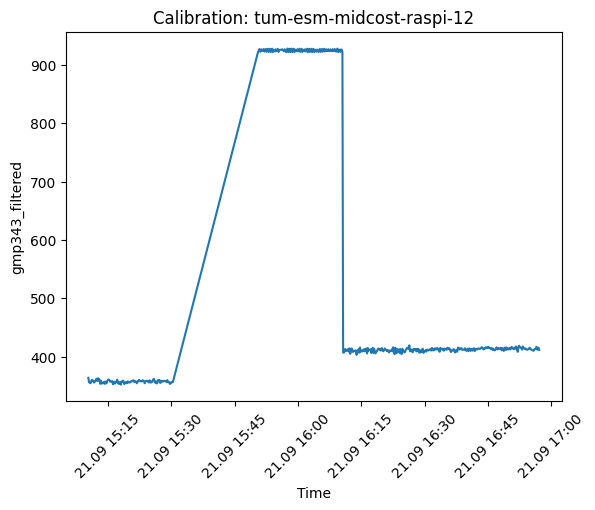

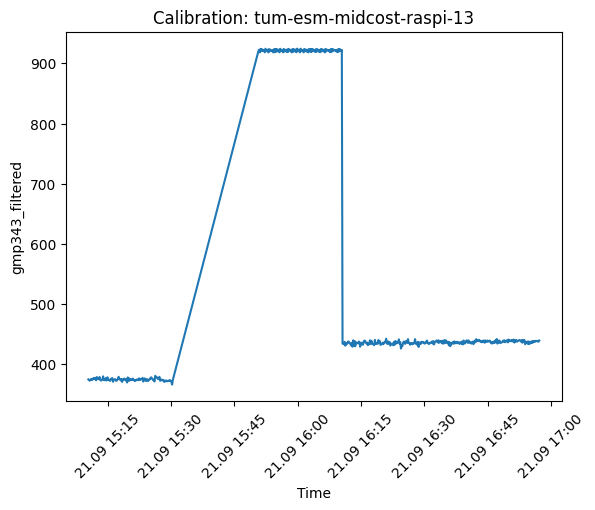

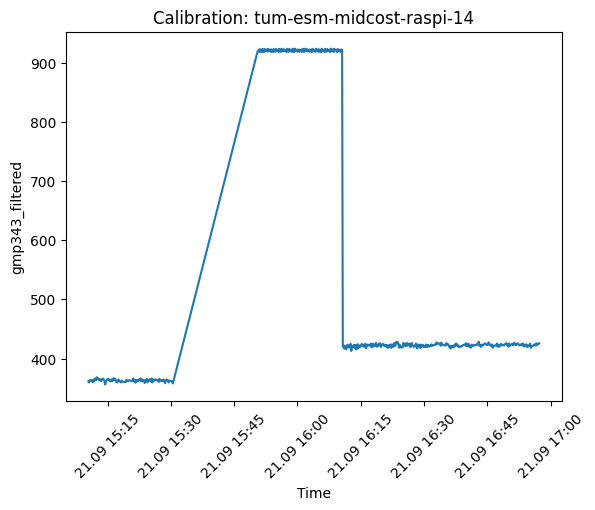

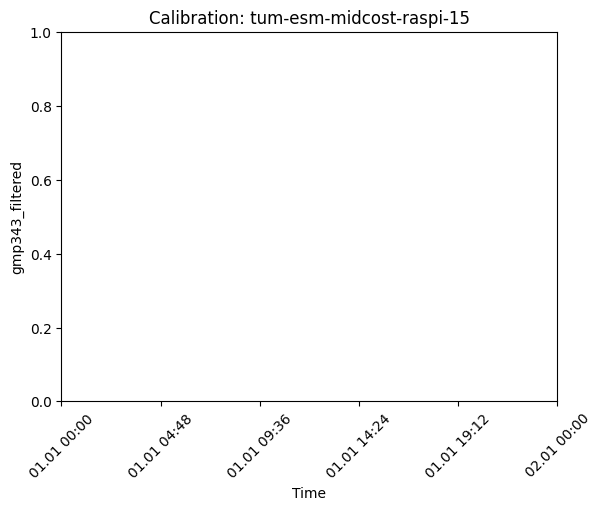

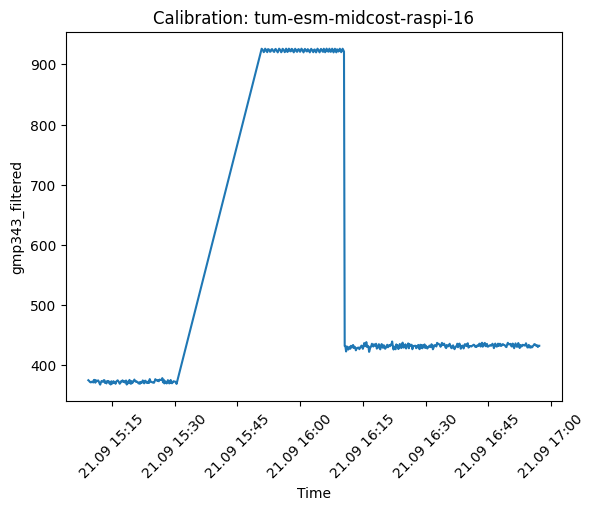

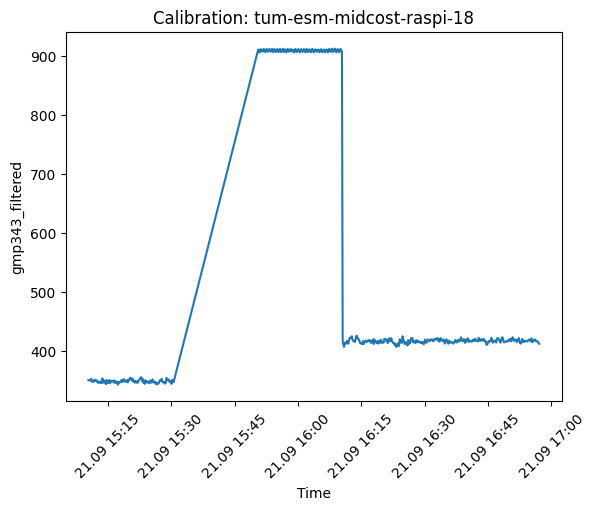

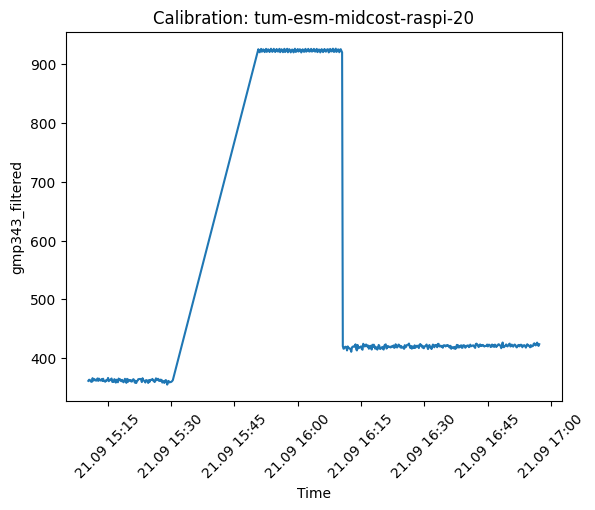

In [22]:
# Plot Calibration Data 
plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None)

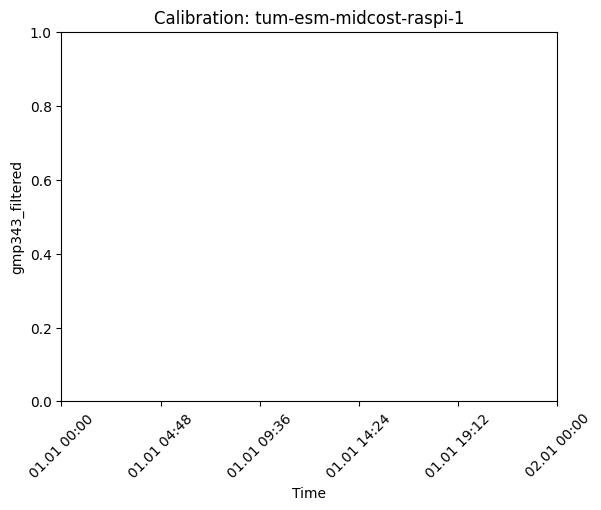

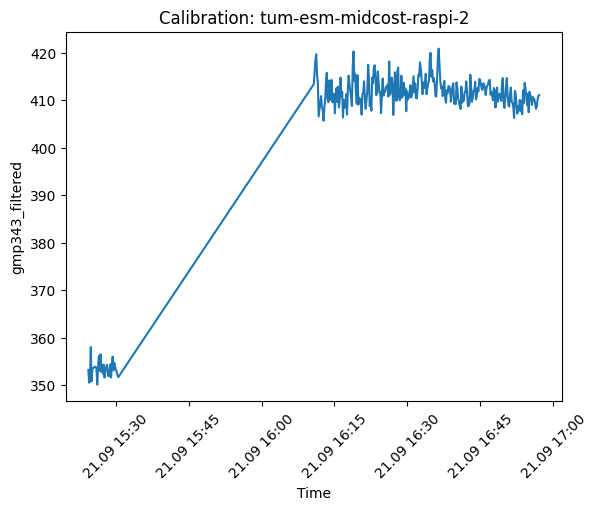

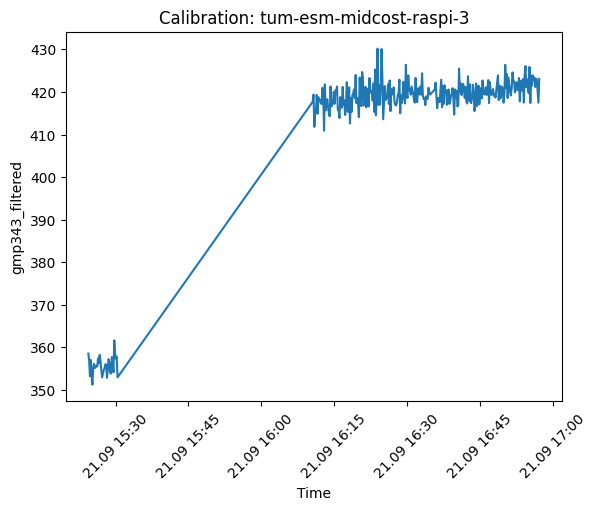

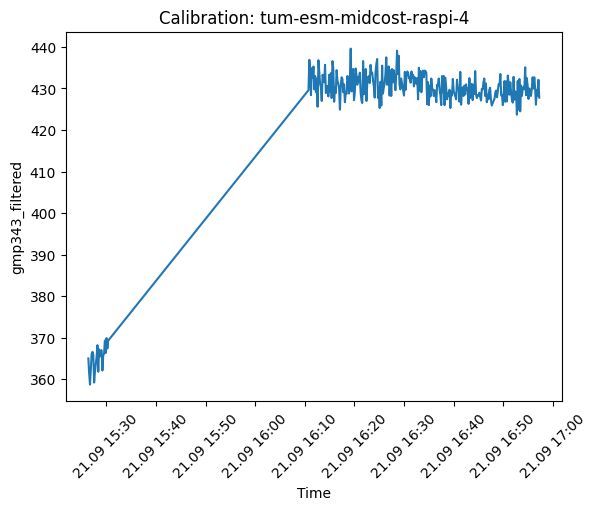

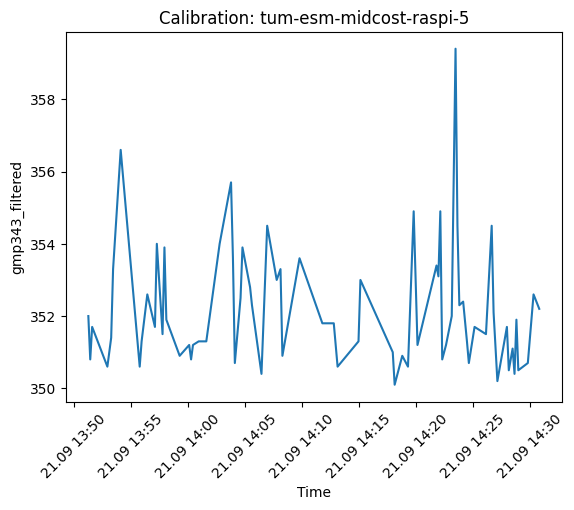

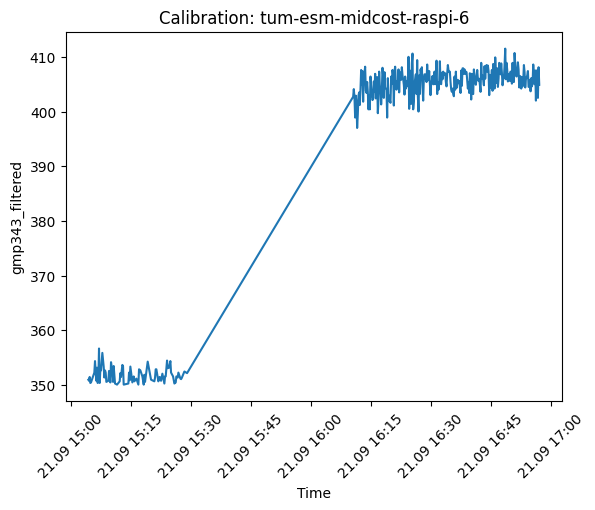

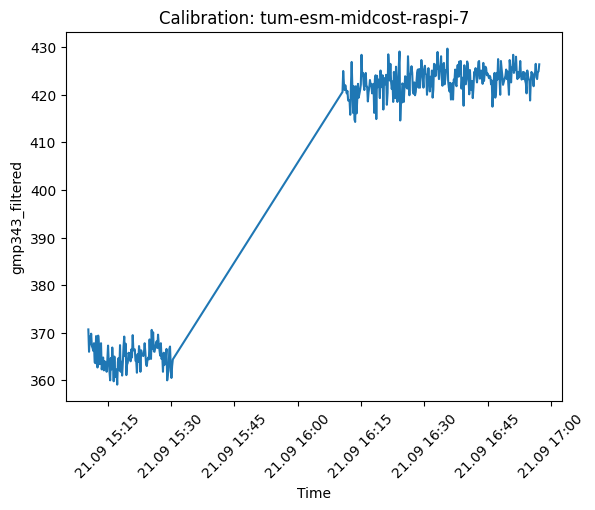

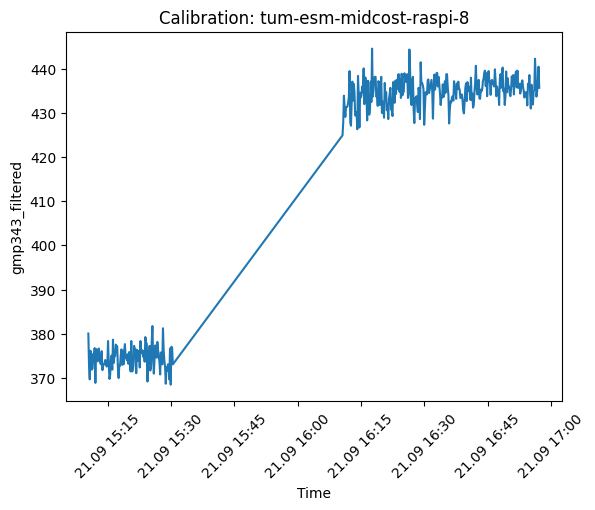

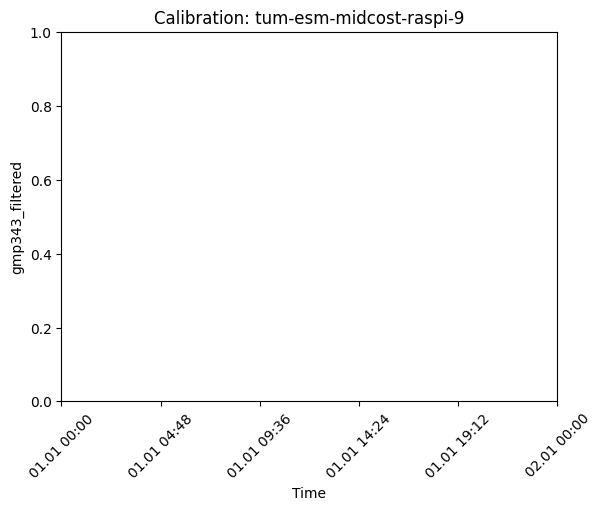

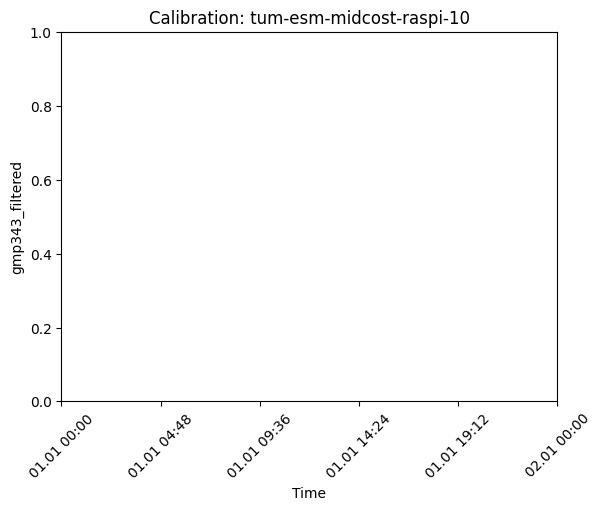

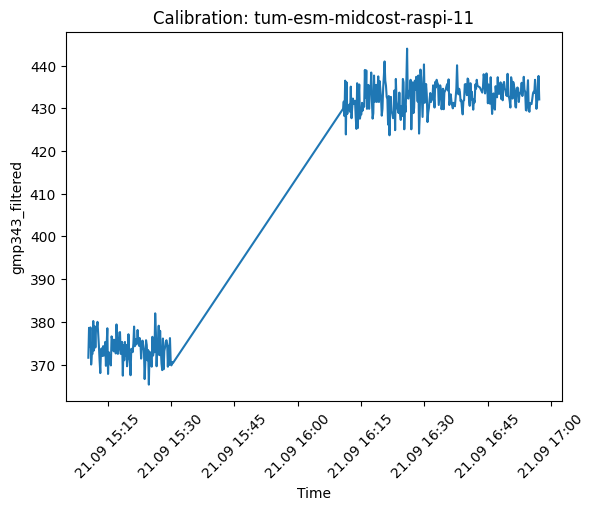

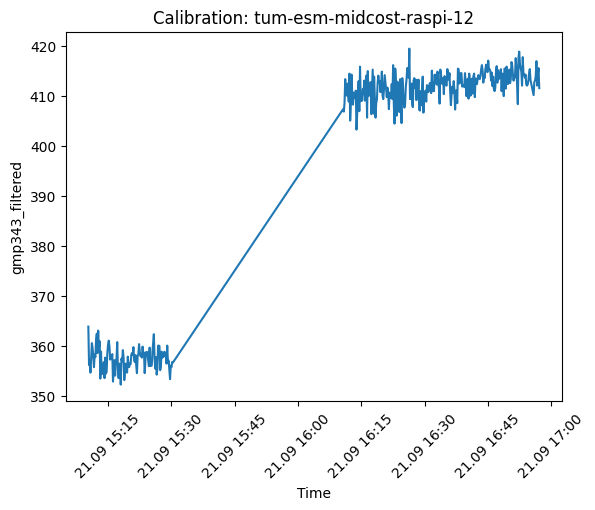

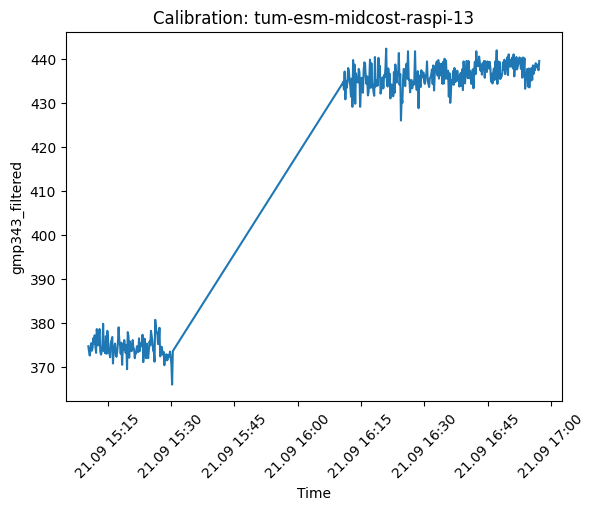

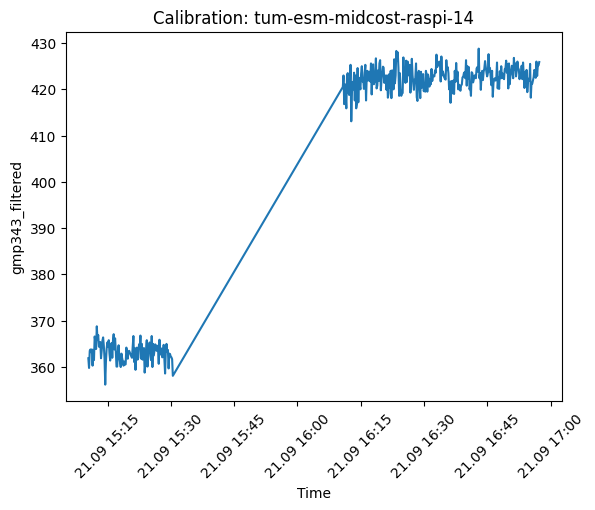

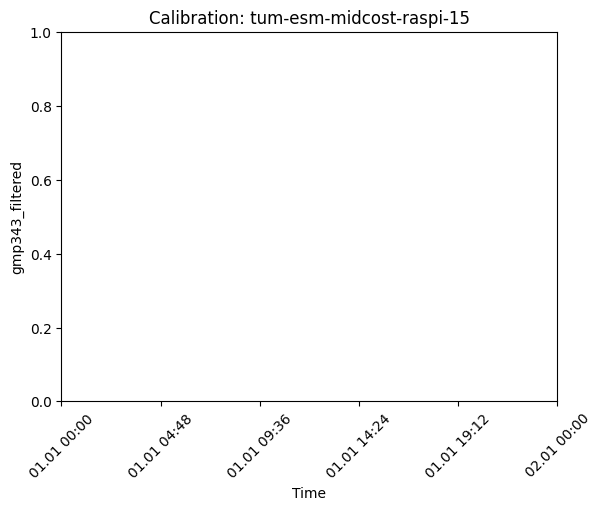

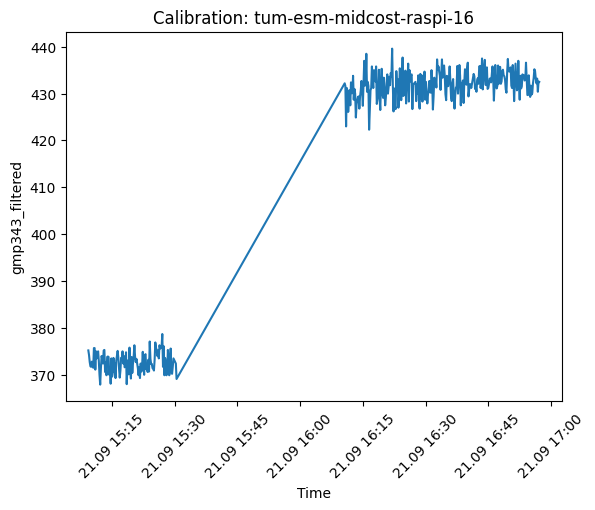

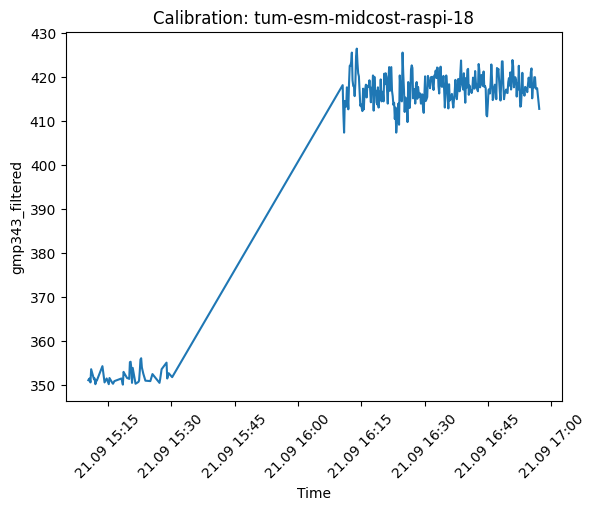

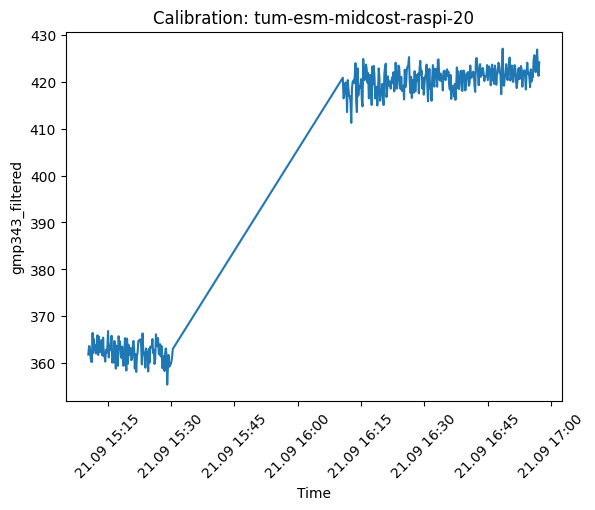

In [23]:
# Plot 400ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_above= 450, cut_below=350)


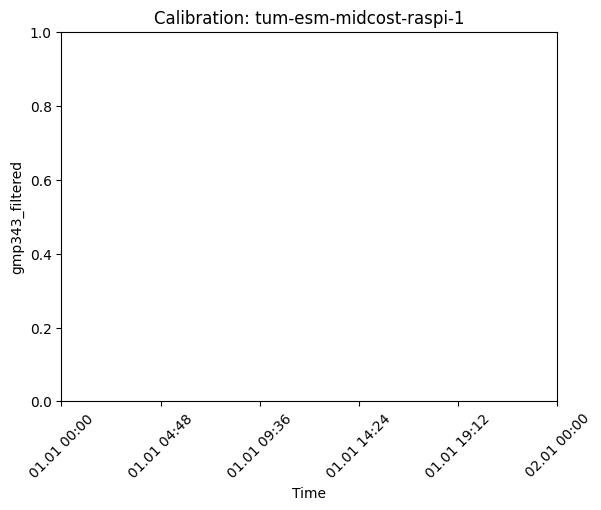

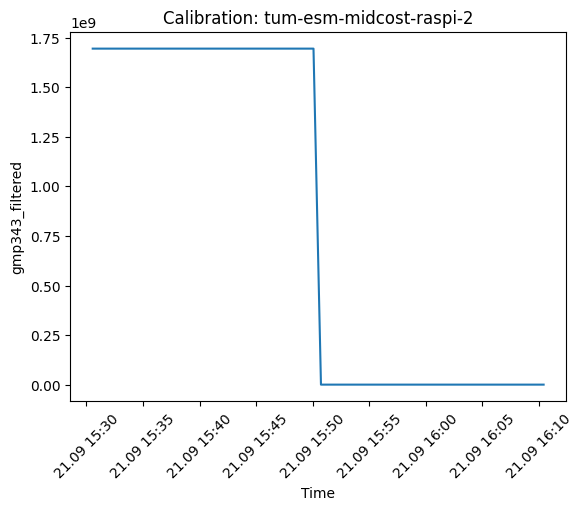

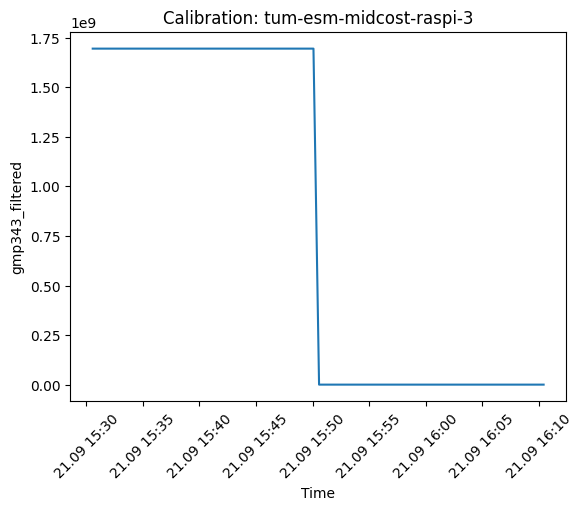

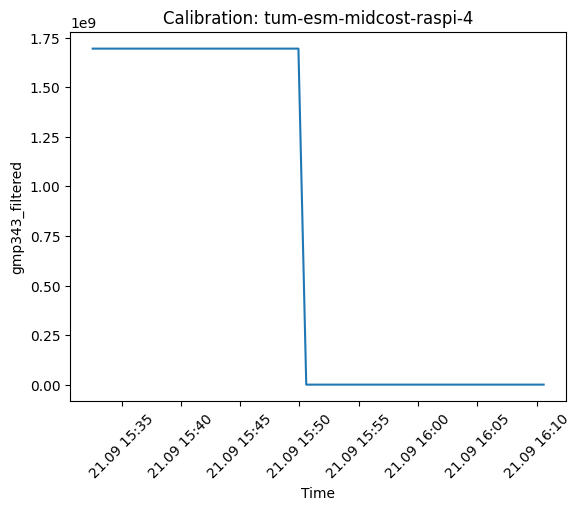

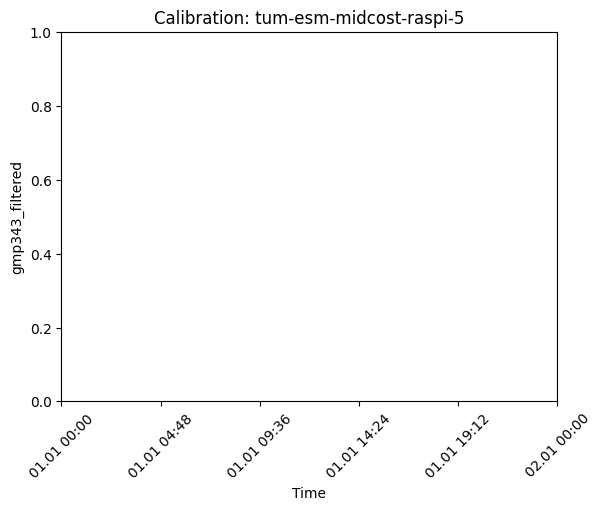

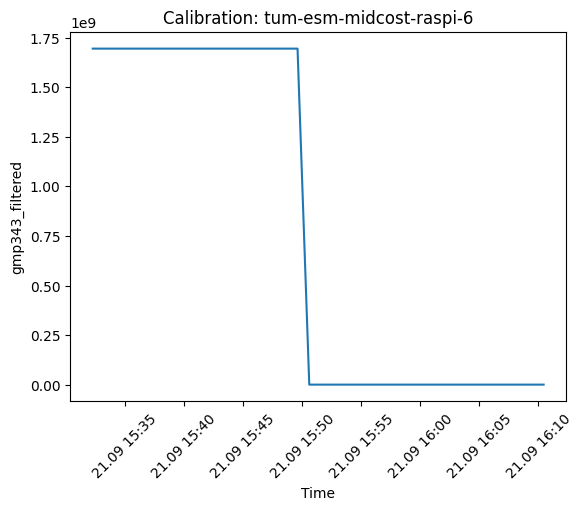

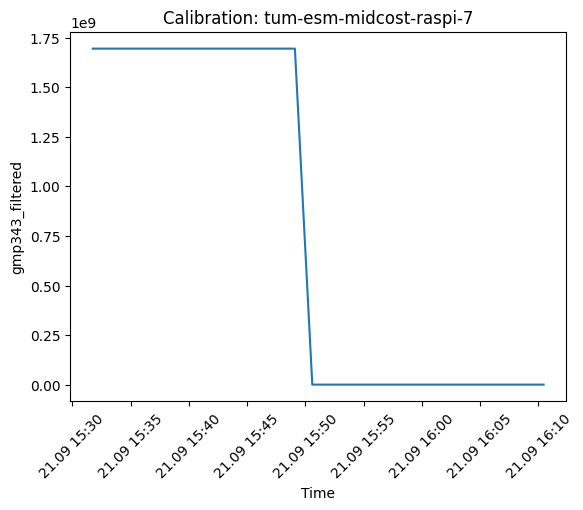

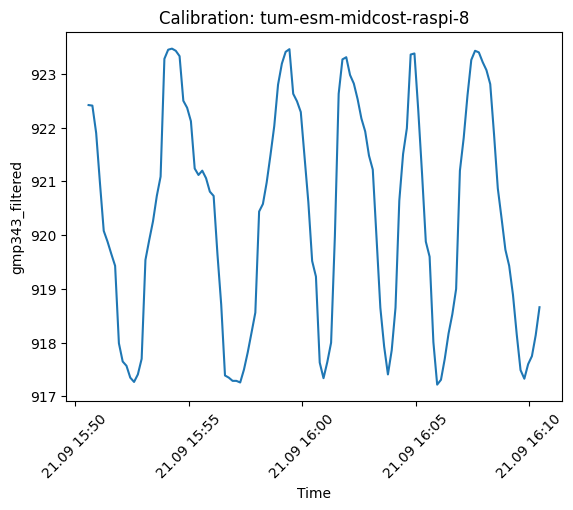

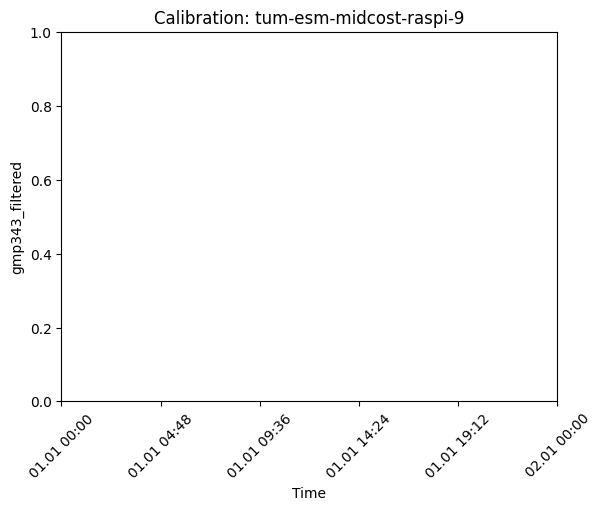

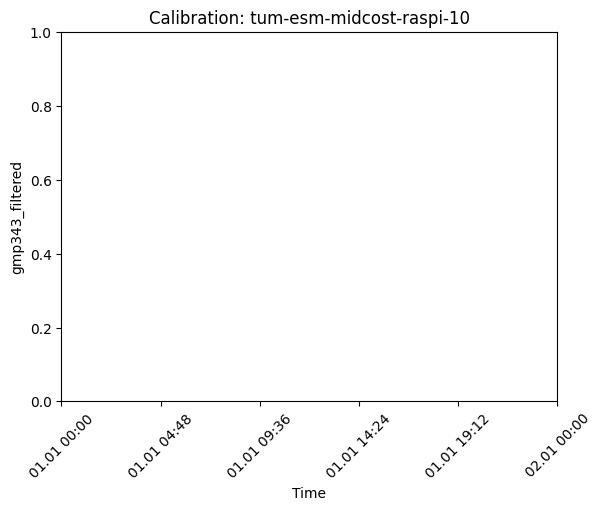

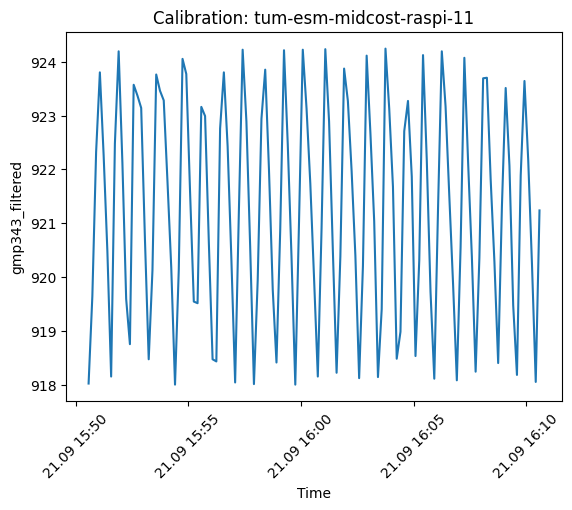

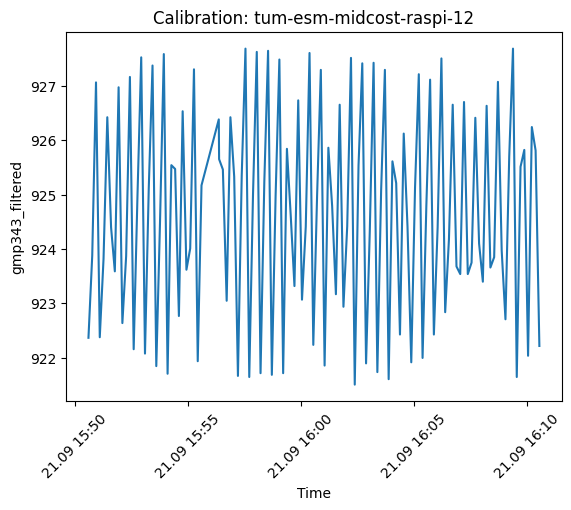

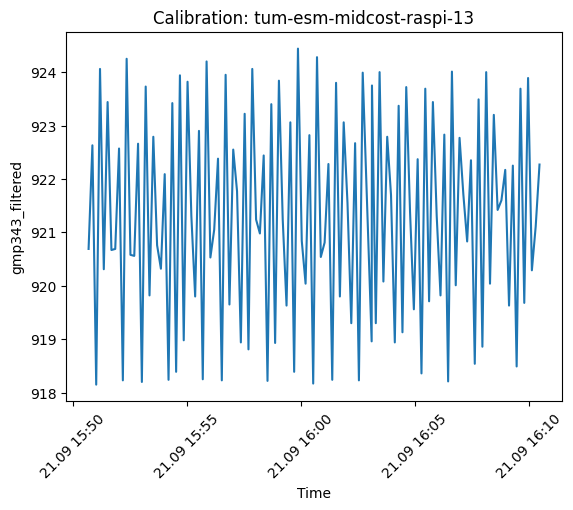

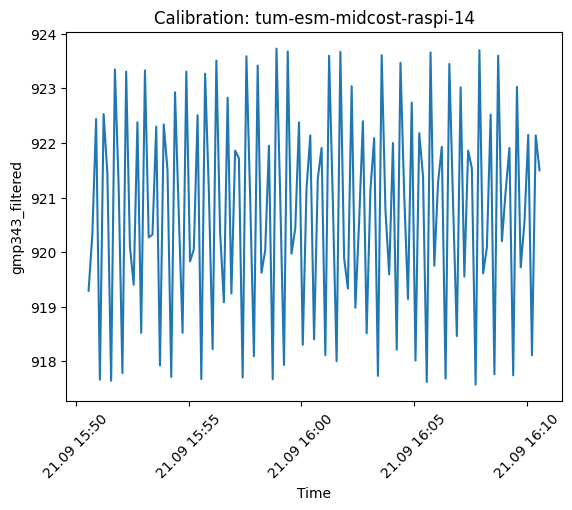

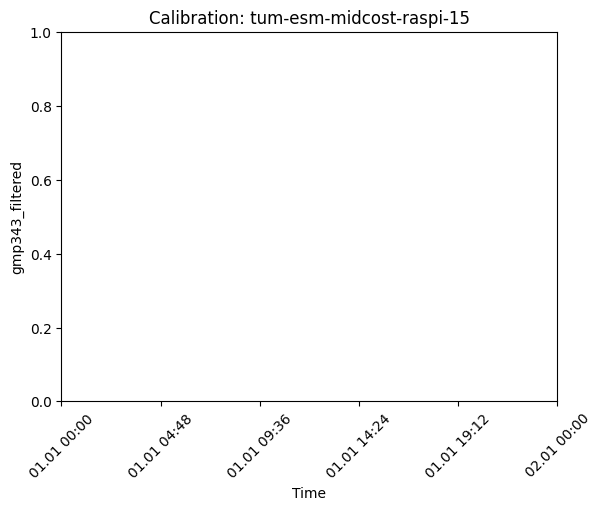

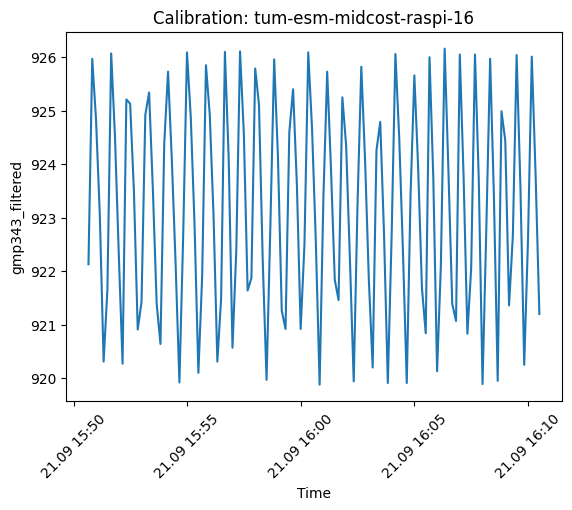

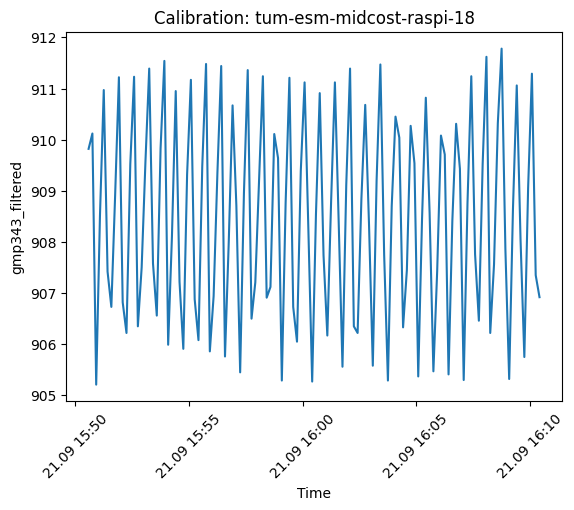

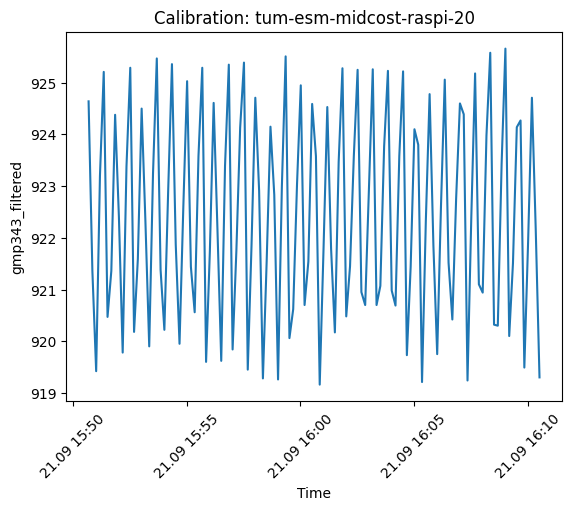

In [24]:
# Plot 800ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_below=700)